## Problem Statement

    - A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free
    
    - A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic
    
    -  So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state
    
    - They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits
    
    -They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends

## The Company wants to know
    - Which variables are significant in predicting the demand for shared bikes
    
    - How well those variables describe the bike demands

## Business Goal
    - Model the demand for shared bikes with the available independent variables
    
    - Used by the management to understand how exactly the demands vary with different features
    
    - They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations
    
    - the model will be a good way for management to understand the demand dynamics of a new market

## Loading Data & EDA

In [1121]:
#importing pandas library

import pandas as pd

In [1122]:
#Loading Dataset and checking fist 5 rows

bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1123]:
#checking rows & columns of Dataframe

bike.shape

(730, 16)

730 rows & 16 columns

In [1124]:
#Checking the info of the Dataframe

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1125]:
#Checking the missing values

bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [1126]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Checking the unique values of Categorical variable

In [1127]:
#Checking the unique values of 'season'

bike['season'].unique()

array([1, 2, 3, 4])

Here the value of 'season' represent the below categories

1:spring 
2:summer
3:fall
4:winter

In [1128]:
#Checking the unique values of 'yr'

bike['yr'].unique()

array([0, 1])

Here the value of 'yr' represent the below year values

0: 2018, 1:2019

In [1129]:
#Checking the unique values of 'mnth'

bike['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Here the value of 'mnth' represent the 12 months from january to december

In [1130]:
#Checking the unique values of 'holiday'

bike['holiday'].unique()

array([0, 1])

Here the value of 'holiday' represent the whether the day is holiday or not

holiday - 0,
Not a holiday - 0

In [1131]:
#Checking the unique values of 'weekday'

bike['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5])

Here the value of 'weekday' represent the days from sunday to saturday

In [1132]:
#Checking the unique values of 'weathersit'

bike['weathersit'].unique()

array([2, 1, 3])

Here the value of 'weathersit' represent the weather situtation of the day

weathersit :<br>
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>

**As you see, value '4' is not available in the unique values.<br>
This shows that no one is using bike when it is raining heavily**

## Checking the Stats for Discrete variables

In [1133]:
#Discrete variables  in the Dataframe
bike.loc[:, 'temp':]

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,14.902598,17.68695,69.6087,16.652113,131,670,801
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [1134]:
#stats for Discrete variables

bike.loc[:, 'temp':].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data cleaning

In [1135]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**'Weekday' column values has some discrepancies
For ex: 1st Jan 2018 is 'Monday' and 'weekday' value for the row is 6**

**Likewise the whole column has different values which cannot be manually verified
So, I'm going to change value for weekday from 0 to 6 repesenting the weekday from 'sunday' to 'saturday'**

In [1136]:
# changing value for weekday from 0 to 6 repesenting the weekday from 'sunday' to 'saturday'

bike['weekday'] = bike['instant'].apply(lambda day: day % 7)
bike['weekday']

0      1
1      2
2      3
3      4
4      5
      ..
725    5
726    6
727    0
728    1
729    2
Name: weekday, Length: 730, dtype: int64

Removing the columns which are unnecessary for the Data Analysis

**Target variable 'cnt' is a total of 'casual' & 'registered' users**
**So, we don't need to keep these two as independent variables**

In [1137]:
# Columns such as 'instant', 'dteday', 'casual', 'registered' can be removed

bike.drop(['instant', 'dteday', 'casual', 'registered' ], axis=1, inplace=True)
bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,6,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,1,0,1,10.489153,11.58500,48.3333,23.500518,1796


## Converting Unordered numerical categorical variables to Categorical Variables

**Let's take the first column 'season'**

In [1138]:
bike['season'].unique()

array([1, 2, 3, 4])

Here the value of 'season' represent the below categories

1:spring 2:summer 3:fall 4:winter

In [1139]:
#map values for numbers in 'season'
seasonMap = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}

In [1140]:
#Mapping and updating 'season' with categorical variables

bike['season'] = bike['season'].map(seasonMap)

**Let's take the column 'mnth'**

In [1141]:
#map values for numbers in 'mnth'

monthMap = {1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'}

In [1142]:
#Mapping and updating 'mnth' with categorical variables

bike['mnth'] = bike['mnth'].map(monthMap)

**Let's take the column weekday**

In [1143]:
#map values for numbers in 'weekday'

weekMap = {0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6:'sat'}

In [1144]:
#Mapping and updating 'weekday' with categorical variables

bike['weekday'] = bike['weekday'].map(weekMap)

**Let's take the column weathersit**

In [1145]:
bike['weathersit']

0      2
1      2
2      1
3      1
4      1
      ..
725    2
726    2
727    2
728    1
729    2
Name: weathersit, Length: 730, dtype: int64

In [1146]:
#map values for numbers in 'weathersit'

weatherMap = {1: 'low_cloud', 2: 'mid_cloud', 3: 'light_rain'}

In [1147]:
#Mapping and updating 'weekday' with categorical variables

bike['weathersit'] = bike['weathersit'].map(weatherMap)

In [1148]:
bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,mid_cloud,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,mid_cloud,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,low_cloud,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,low_cloud,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,low_cloud,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,fri,1,mid_cloud,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,dec,0,sat,1,mid_cloud,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,dec,0,sun,0,mid_cloud,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,dec,0,mon,0,low_cloud,10.489153,11.58500,48.3333,23.500518,1796


## Data Visualisation Matplotlib & Seaborn

In [1149]:
#import Data visualisation libraries
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [1150]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

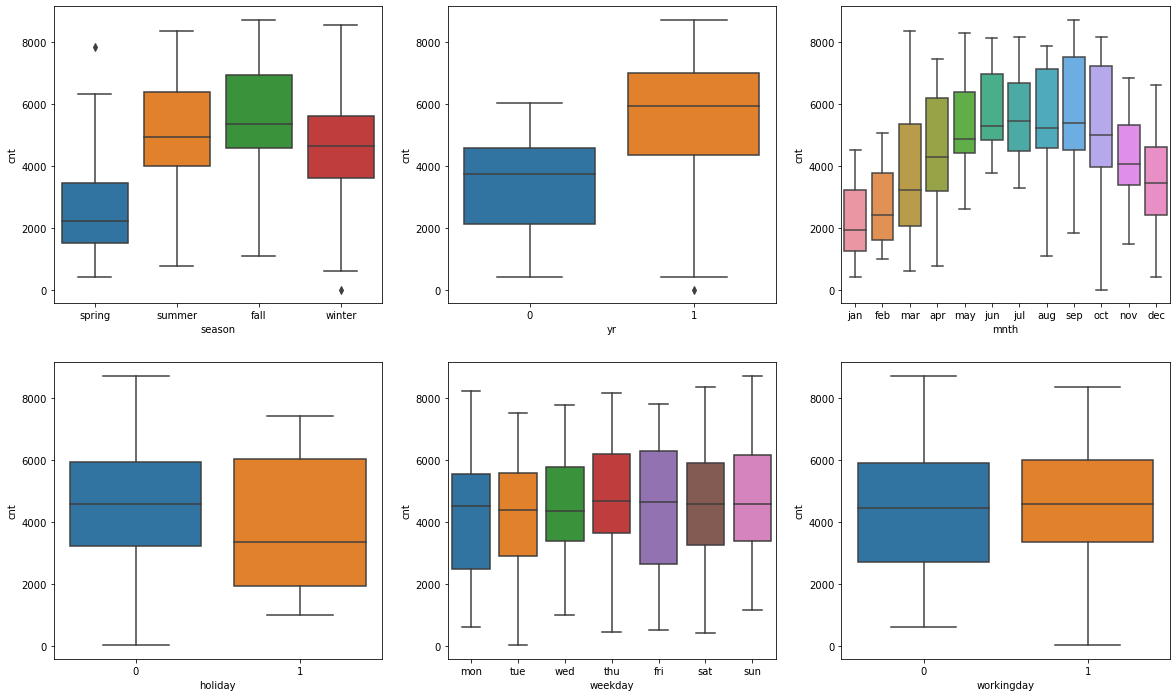

In [1151]:
#boxplot between categorical variables

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

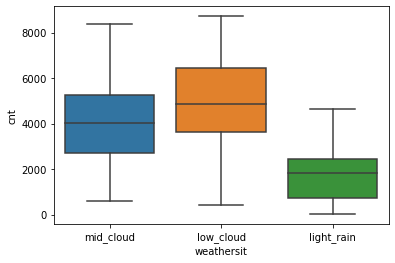

In [1152]:
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()

### Insights from the above Box Plot Visualisation
1. People are more likely to Bike sharing in summer & fall season winter & spring
2. More number of peoples used bike sharing 2019 when compared to 2018
3. More number of peoples used bike share in mid month of the year - June, July, August & september
4. More number of people used bike on weather situation such as low cloud or mid cloud when compared when compared the light rain situation. No one used bike when there was heavy rain

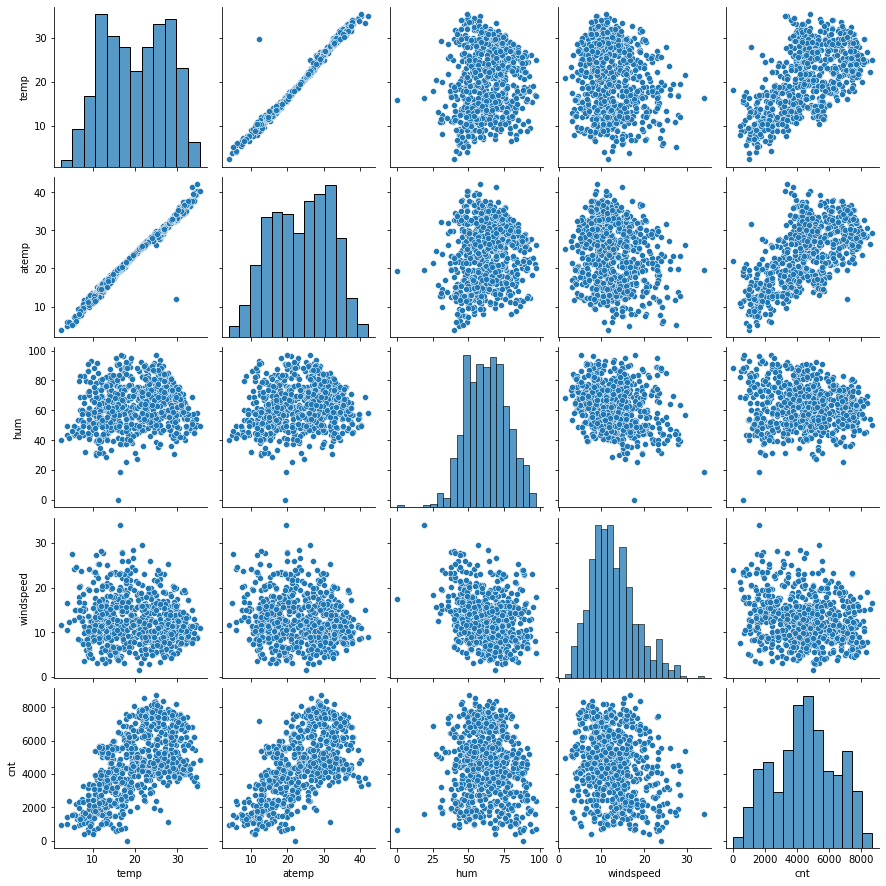

In [1153]:
#pariplot between Discrete variables

sns.pairplot(bike.loc[:, 'temp':])
plt.show()

### Insights from the above pair Plot Visualisation

- There is good trend between 'temp' and 'cnt' of the user who used bike sharing

<AxesSubplot:>

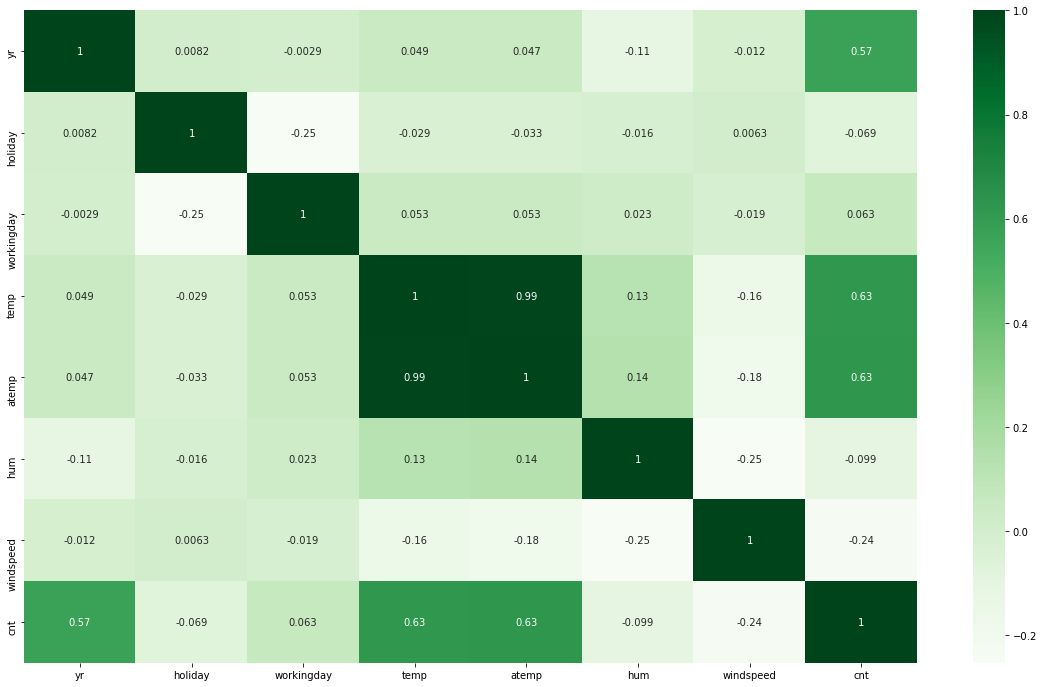

In [1154]:
#Heatmap between variables in the bike dataframe

plt.figure(figsize=(20, 12))
sns.heatmap(bike.corr(), annot=True, cmap='Greens')

### Insights from the above Heatmap Visualisation
1. 'temp' and 'atemp' are highly correlated. So, we can use any one of them in model building 
2. 'cnt' has a high correlation with 'temp', 'yr'

## Creating Dummy Variables

In [1155]:
bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,mid_cloud,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,mid_cloud,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,low_cloud,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,low_cloud,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,low_cloud,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,fri,1,mid_cloud,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,dec,0,sat,1,mid_cloud,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,dec,0,sun,0,mid_cloud,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,dec,0,mon,0,low_cloud,10.489153,11.58500,48.3333,23.500518,1796


### Creating dummy variable for 'season'

In [1156]:
#Creating dummy variable for 'season'
seasonDummy = pd.get_dummies(bike['season'])

#keep the seasonDummy dataframe columns in specific order
seasonDummy = seasonDummy[['spring', 'summer', 'fall', 'winter']]
seasonDummy

,spring,summer,fall,winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
725,1,0,0,0
726,1,0,0,0
727,1,0,0,0
728,1,0,0,0


### Creating dummy variable for 'mnth'

In [1157]:
#Creating dummy variable for 'mnth'
monthDummy = pd.get_dummies(bike['mnth'])

#keep the monthDummy dataframe columns in specific order
monthDummy = monthDummy[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']]
monthDummy

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,0,0,0,0,0,0,0,0,0,1
726,0,0,0,0,0,0,0,0,0,0,0,1
727,0,0,0,0,0,0,0,0,0,0,0,1
728,0,0,0,0,0,0,0,0,0,0,0,1


### Creating dummy variable for 'weekday'

In [1158]:
#Creating dummy variable for 'weekday'
weekDummy = pd.get_dummies(bike['weekday'])

#keep the weekDummy dataframe columns in specific order
weekDummy = weekDummy[['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']]
weekDummy

,sun,mon,tue,wed,thu,fri,sat
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
725,0,0,0,0,0,1,0
726,0,0,0,0,0,0,1
727,1,0,0,0,0,0,0
728,0,1,0,0,0,0,0


### Creating dummy variable for 'weathersit'

In [1159]:
#Creating dummy variable for 'weathersit'
weathersitDummy = pd.get_dummies(bike['weathersit'])

#keep the weathersitDummy dataframe columns in specific order
weathersitDummy = weathersitDummy[['low_cloud', 'mid_cloud', 'light_rain']]
weathersitDummy

,low_cloud,mid_cloud,light_rain
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,0,1,0
726,0,1,0
727,0,1,0
728,1,0,0


## Joining all the Dummy variable dataframes with the Main Dataframe

In [1160]:
bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,mid_cloud,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,mid_cloud,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,low_cloud,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,low_cloud,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,low_cloud,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,fri,1,mid_cloud,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,dec,0,sat,1,mid_cloud,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,dec,0,sun,0,mid_cloud,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,dec,0,mon,0,low_cloud,10.489153,11.58500,48.3333,23.500518,1796


In [1161]:
#adding Dummy variables dataframe such as 'seasonDummy', 'monthDummy', 'weekDummy', 'weathersitDummy'
#to the main variables

bike = bike.join(seasonDummy).join(monthDummy).join(weekDummy).join(weathersitDummy)
bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,fall,winter,jan,...,jun,jul,aug,sep,oct,nov,dec,sun,mon,tue,wed,thu,fri,sat,low_cloud,mid_cloud,light_rain
0,spring,0,jan,0,mon,0,mid_cloud,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,spring,0,jan,0,tue,0,mid_cloud,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,spring,0,jan,0,wed,1,low_cloud,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,spring,0,jan,0,thu,1,low_cloud,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,spring,0,jan,0,fri,1,low_cloud,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,fri,1,mid_cloud,10.420847,11.33210,65.2917,23.458911,2114,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
726,spring,1,dec,0,sat,1,mid_cloud,10.386653,12.75230,59.0000,10.416557,3095,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
727,spring,1,dec,0,sun,0,mid_cloud,10.386653,12.12000,75.2917,8.333661,1341,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
728,spring,1,dec,0,mon,0,low_cloud,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0


In [1162]:
#remove the categorical main variable related to dummy variable

bike.drop(['season', 'mnth', 'weekday', 'weathersit'], axis = 1, inplace=True)

In [1163]:
#checking

bike

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,fall,winter,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,sun,mon,tue,wed,thu,fri,sat,low_cloud,mid_cloud,light_rain
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
726,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0


In [1164]:
#check the number of rows & columns

bike.shape

(730, 34)

In [1165]:
#expand the columns in the dataframe for viewing

pd.set_option("display.max_columns", 34)

In [1166]:
#Checking the first 10 rows

bike.head(10)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,fall,winter,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,sun,mon,tue,wed,thu,fri,sat,low_cloud,mid_cloud,light_rain
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
5,0,0,1,8.378268,11.66045,51.8261,6.000868,1606,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
6,0,0,1,8.057402,10.44195,49.8696,11.304642,1510,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7,0,0,0,6.765000,8.11270,53.5833,17.875868,959,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
9,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


**After cleaning & Data Preparation, we came up with 34 columns**

Those 34 columns are<br>
    - 3 Binary categorical variables<br>
    - 5 Discrete variables<br>
    - 4 Season<br>
    - 12 months<br>
    - 7 days<br>
    - 3 weather situation<br>

## Divide the data into training & test data sets 
## For model building & evaluation

In [1167]:
#import library to split train & test data

from sklearn.model_selection import train_test_split

In [1168]:
#import Numpy

import numpy as np

In [1169]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

bike_train, bike_test = train_test_split(bike, train_size=0.7, test_size=0.3, random_state=100)

In [1170]:
#Check the bike_train data

bike_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,fall,winter,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,sun,mon,tue,wed,thu,fri,sat,low_cloud,mid_cloud,light_rain
653,1,0,1,19.201653,23.04230,55.8333,12.208807,7534,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
576,1,0,1,29.246653,33.14480,70.4167,11.083475,7216,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
426,1,0,0,16.980847,20.67460,62.1250,10.792293,4066,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.87520,48.9583,8.708325,4220,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,32.98605,58.7917,13.916771,6664,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
578,1,0,1,30.852500,35.35440,65.9583,8.666718,7261,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
53,0,0,1,9.091299,12.28585,42.3043,6.305571,1917,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
350,0,0,0,10.591653,12.46855,56.0833,16.292189,2739,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0


In [1171]:
#Check the bike_test data

bike_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,fall,winter,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,sun,mon,tue,wed,thu,fri,sat,low_cloud,mid_cloud,light_rain
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,10.899153,13.22605,68.7917,11.791732,2947,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
702,1,0,1,19.509153,23.45270,73.3750,11.666643,6606,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
127,0,0,0,21.661653,25.94665,63.1667,5.000712,4333,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0


## Rescaling feature

Since we are going to intrepet the efficiency of variables in the end,
we are going to Rescale the Discrete variables such as 'temp', 'atemp', 'hum', 'windspeed', 'cnt'

Why only discrete variables?
Because those variable very big when compared to the dummy variable's 0s and 1s
So we have to rescale the discrete variable

In [1172]:
#import library for MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

In [1173]:
#create a MinMaxScaler object to rescale

scale = MinMaxScaler()

In [1174]:
#list of Discrete variables for Rescaling

disc_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [1175]:
#scaled the Discrete variables

bike_train[disc_vars] = scale.fit_transform(bike_train[disc_vars])

In [1176]:
#checking

bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,fall,winter,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,sun,mon,tue,wed,thu,fri,sat,low_cloud,mid_cloud,light_rain
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


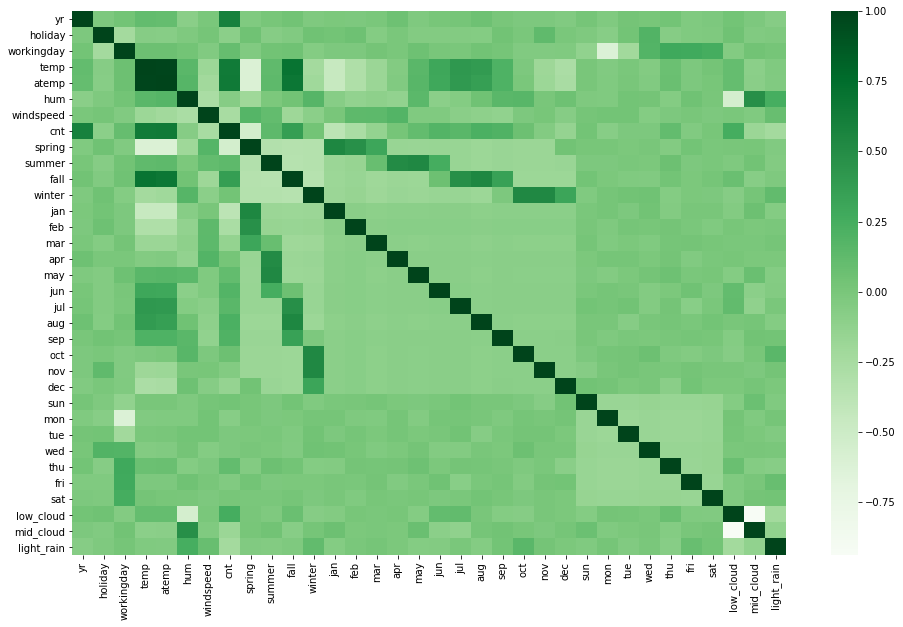

In [1177]:
#checking the heatmap for the variables

plt.figure(figsize = (16, 10))
sns.heatmap(bike_train.corr(), cmap='Greens')
plt.show()

In [1178]:
# Slice the x & Y value from bike_train data set

y_train = bike_train.pop('cnt')
print(y_train)

x_train = bike_train
print(x_train)

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64
     yr  holiday  workingday      temp     atemp       hum  windspeed  spring  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794       0   
576   1        0           1  0.815169  0.766351  0.725633   0.264686       0   
426   1        0           0  0.442393  0.438975  0.640189   0.255342       1   
728   1        0           0  0.245101  0.200348  0.498067   0.663106       1   
482   1        0           0  0.395666  0.391735  0.504508   0.188475       0   
..   ..      ...         ...       ...       ...       ...        ...     ...   
526   1        0           1  0.824514  0.762183  0.605840   0.355596       0   
578   1        0           1  0.863973  0.824359  0.679690   0.187140       0   
53    0        0           1  0.202618  0.218747  0.4359

## Recursive Feature Elimination(RFE)

We have 33 columns in the x_train dataframe. So, its hard to pick the right variable only by one

So, we can use RFE to filter the top 20 variables by Automatic selection
And the remove the less efficient variables by Manual selection

In [1179]:
#import libraries such as RFE & LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1180]:
#Running RFE to select 20 variable from the 33 variables

lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 20)
rfe = rfe.fit(x_train, y_train)

In [1181]:
#extract the support & rank for all columns

list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 14),
 ('workingday', False, 13),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('fall', True, 1),
 ('winter', True, 1),
 ('jan', True, 1),
 ('feb', True, 1),
 ('mar', False, 6),
 ('apr', False, 8),
 ('may', True, 1),
 ('jun', False, 5),
 ('jul', True, 1),
 ('aug', False, 4),
 ('sep', True, 1),
 ('oct', False, 7),
 ('nov', True, 1),
 ('dec', True, 1),
 ('sun', False, 9),
 ('mon', True, 1),
 ('tue', True, 1),
 ('wed', False, 2),
 ('thu', False, 10),
 ('fri', False, 12),
 ('sat', False, 11),
 ('low_cloud', True, 1),
 ('mid_cloud', True, 1),
 ('light_rain', True, 1)]

In [1182]:
#only extract columns which rfe.support_ as True and rfe.rank_ as 1

rfe_col = x_train.columns[rfe.support_]
rfe_col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'spring', 'fall', 'winter',
       'jan', 'feb', 'may', 'jul', 'sep', 'nov', 'dec', 'mon', 'tue',
       'low_cloud', 'mid_cloud', 'light_rain'],
      dtype='object')

In [1183]:
#variable which are elimated using RFE

x_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'summer', 'mar', 'apr', 'jun', 'aug', 'oct',
       'sun', 'wed', 'thu', 'fri', 'sat'],
      dtype='object')

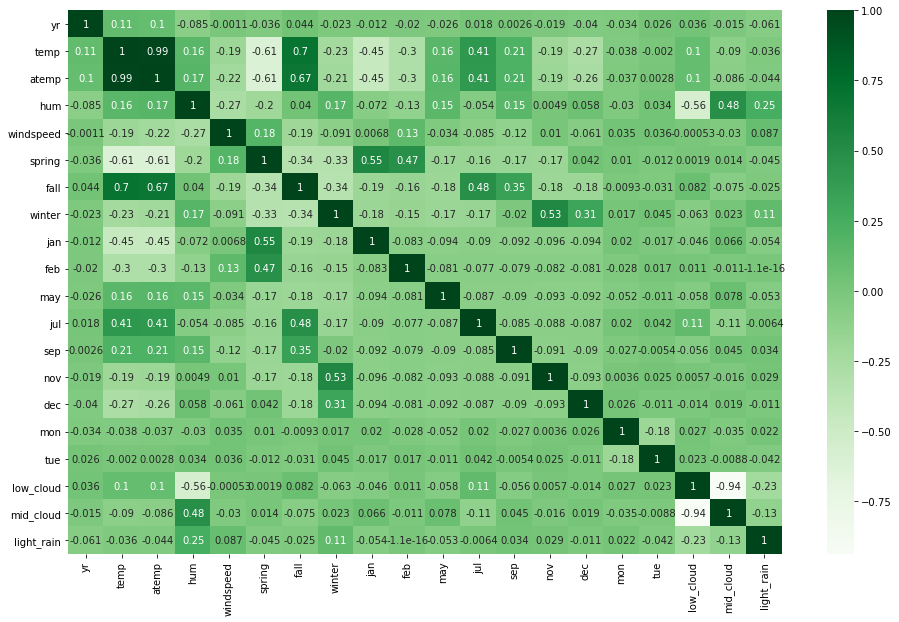

In [1184]:
#Heatmap for selected columns from RFE

plt.figure(figsize = (16, 10))
sns.heatmap(x_train[rfe_col].corr(), annot=True, cmap='Greens')
plt.show()

**'temp' & 'atemp' are highly correlated which 0.99**
**So, we can remove 'atemp'**

## For Detailed statistics, Build model using statsmodel

In [1185]:
#import statsmodels libray

import statsmodels.api as sm

In [1186]:
#take only the variables selected from RFE

x_train_rfe = x_train[rfe_col]
x_train_rfe

,yr,temp,atemp,hum,windspeed,spring,fall,winter,jan,feb,may,jul,sep,nov,dec,mon,tue,low_cloud,mid_cloud,light_rain
653,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0.815169,0.766351,0.725633,0.264686,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
426,1,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
728,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0
482,1,0.395666,0.391735,0.504508,0.188475,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0.824514,0.762183,0.605840,0.355596,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
578,1,0.863973,0.824359,0.679690,0.187140,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
53,0,0.202618,0.218747,0.435939,0.111379,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
350,0,0.248216,0.223544,0.577930,0.431816,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0


In [1187]:
#Add constant to variables because we should also add intercept value in statsmodel library

x_train_rfe = sm.add_constant(x_train_rfe)
x_train_rfe

,const,yr,temp,atemp,hum,windspeed,spring,fall,winter,jan,feb,may,jul,sep,nov,dec,mon,tue,low_cloud,mid_cloud,light_rain
653,1.0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
576,1.0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
426,1.0,1,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
728,1.0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0
482,1.0,1,0.395666,0.391735,0.504508,0.188475,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.762183,0.605840,0.355596,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
578,1.0,1,0.863973,0.824359,0.679690,0.187140,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
53,1.0,0,0.202618,0.218747,0.435939,0.111379,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
350,1.0,0,0.248216,0.223544,0.577930,0.431816,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0


In [1188]:
#Fit the model with Ordinary Least Squares method

lm = sm.OLS(y_train,x_train_rfe).fit()

In [1189]:
#summary of the model

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     141.8
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          3.60e-185
Time:                        23:41:09   Log-Likelihood:                 515.74
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     490   BIC:                            -906.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2050      0.027      7.573      0.000       0.152       0.258
yr             0.2319      0.008     28.575      0.000       0.216       0.248
temp           0.3960      0.136      2.913      0.004       0.129       0.663
atemp          0.0528      0.138      0.384      0.701      -0.218       0.323
hum           -0.1584      0.038     -4.129      0.000      -0.234      -0.083
windspeed     -0.1817      0.026     -6.871      0.000      -0.234      -0.130
spring        -0.0844      0.018     -4.704      0.000      -0.120      -0.049
fall          -0.0253      0.018     -1.441      0.150      -0.060       0.009
winter         0.0740      0.016      4.656      0.000       0.043       0.105
jan           -0.0688      0.022     -3.188      0.002      -0.111      -0.026
feb           -0.0426      0.022     -1.961      0.051      -0.085    9.36e-05
may            0.0240      0.018      1.359      0.175      -0.011       0.059
jul           -0.0493      0.018     -2.682      0.008      -0.085      -0.013
sep            0.0688      0.017      4.064      0.000       0.036       0.102
nov           -0.0569      0.019     -3.016      0.003      -0.094      -0.020
dec           -0.0515      0.018     -2.799      0.005      -0.088      -0.015
mon           -0.0233      0.011     -2.070      0.039      -0.045      -0.001
tue           -0.0283      0.011     -2.490      0.013      -0.051      -0.006
low_cloud      0.1701      0.010     17.046      0.000       0.150       0.190
mid_cloud      0.1136      0.012      9.473      0.000       0.090       0.137
light_rain    -0.0787      0.022     -3.571      0.000      -0.122      -0.035
==============================================================================
Omnibus:                       90.113   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.394
Skew:                          -0.843   Prob(JB):                     1.73e-57
Kurtosis:                       6.076   Cond. No.                     2.13e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.59e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1190]:
#remove the const from the independent variable to check the VIF

x_train_rfe.drop(['const'], axis = 1, inplace=True)

In [1191]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,59.50
2,atemp,53.89
17,low_cloud,41.28
18,mid_cloud,28.06
19,light_rain,3.83
6,fall,3.79
5,spring,3.75
7,winter,2.99
8,jan,2.37
3,hum,1.98


## From the statsmodel summary & VIF, we found that

    - 'atemp' has a very low p-value less than 0.05(5%)
    - 'atemp' has a very high(above 30) VIF - 53
    - 'atemp' has 'temp' has very high correlation of 0.99

So, we can remove atemp from x_train_rfe

In [1192]:
#remove atemp from x_train_rfe

x_train_rfe.pop('atemp')

653    0.501133
576    0.766351
426    0.438975
728    0.200348
482    0.391735
         ...   
526    0.762183
578    0.824359
53     0.218747
350    0.223544
79     0.434043
Name: atemp, Length: 510, dtype: float64

In [1193]:
#checking

x_train_rfe

,yr,temp,hum,windspeed,spring,fall,winter,jan,feb,may,jul,sep,nov,dec,mon,tue,low_cloud,mid_cloud,light_rain
653,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
426,1,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
728,1,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0
482,1,0.395666,0.504508,0.188475,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0.824514,0.605840,0.355596,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
578,1,0.863973,0.679690,0.187140,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
53,0,0.202618,0.435939,0.111379,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
350,0,0.248216,0.577930,0.431816,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0


In [1194]:
#Add constant to variables because we should also add intercept value in statsmodel library
x_train_rfe = sm.add_constant(x_train_rfe)


#Fit the model with Ordinary Least Squares method
lm = sm.OLS(y_train,x_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     149.9
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          3.12e-186
Time:                        23:41:09   Log-Likelihood:                 515.67
No. Observations:                 510   AIC:                            -993.3
Df Residuals:                     491   BIC:                            -912.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2054      0.027      7.598      0.000       0.152       0.259
yr             0.2318      0.008     28.597      0.000       0.216       0.248
temp           0.4459      0.039     11.464      0.000       0.370       0.522
hum           -0.1576      0.038     -4.119      0.000      -0.233      -0.082
windspeed     -0.1837      0.026     -7.091      0.000      -0.235      -0.133
spring        -0.0845      0.018     -4.715      0.000      -0.120      -0.049
fall          -0.0266      0.017     -1.544      0.123      -0.061       0.007
winter         0.0740      0.016      4.662      0.000       0.043       0.105
jan           -0.0691      0.022     -3.203      0.001      -0.111      -0.027
feb           -0.0427      0.022     -1.965      0.050      -0.085   -1.03e-05
may            0.0238      0.018      1.349      0.178      -0.011       0.058
jul           -0.0488      0.018     -2.664      0.008      -0.085      -0.013
sep            0.0692      0.017      4.100      0.000       0.036       0.102
nov           -0.0569      0.019     -3.016      0.003      -0.094      -0.020
dec           -0.0514      0.018     -2.797      0.005      -0.087      -0.015
mon           -0.0232      0.011     -2.065      0.039      -0.045      -0.001
tue           -0.0282      0.011     -2.484      0.013      -0.050      -0.006
low_cloud      0.1705      0.010     17.190      0.000       0.151       0.190
mid_cloud      0.1139      0.012      9.525      0.000       0.090       0.137
light_rain    -0.0790      0.022     -3.591      0.000      -0.122      -0.036
==============================================================================
Omnibus:                       89.511   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.430
Skew:                          -0.837   Prob(JB):                     4.63e-57
Kurtosis:                       6.067   Cond. No.                     1.50e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.61e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1195]:
#remove the const from the independent variable to check the VIF

x_train_rfe.drop(['const'], axis = 1, inplace=True)

In [1196]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,low_cloud,41.12
17,mid_cloud,28.00
1,temp,4.88
18,light_rain,3.83
4,spring,3.75
5,fall,3.65
6,winter,2.99
7,jan,2.37
2,hum,1.97
8,feb,1.86


## From the statsmodel summary & VIF, we found that

    - 'feb' has a very low p-value which 0.05(5%)

So, we can remove 'feb' from x_train_rfe

In [1197]:
#remove atemp from x_train_rfe

x_train_rfe.pop('feb')

653    0
576    0
426    0
728    0
482    0
      ..
526    0
578    0
53     1
350    0
79     0
Name: feb, Length: 510, dtype: uint8

In [1198]:
#checking

x_train_rfe

,yr,temp,hum,windspeed,spring,fall,winter,jan,may,jul,sep,nov,dec,mon,tue,low_cloud,mid_cloud,light_rain
653,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,1,0,0
576,1,0.815169,0.725633,0.264686,0,1,0,0,0,1,0,0,0,0,0,1,0,0
426,1,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0,0,0,1,0
728,1,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,1,1,0,1,0,0
482,1,0.395666,0.504508,0.188475,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0.824514,0.605840,0.355596,0,0,0,0,0,0,0,0,0,0,1,0,1,0
578,1,0.863973,0.679690,0.187140,0,1,0,0,0,0,0,0,0,0,0,1,0,0
53,0,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0,0,0,1,0,0
350,0,0.248216,0.577930,0.431816,0,0,1,0,0,0,0,0,1,1,0,0,1,0


In [1199]:
#Add constant to variables because we should also add intercept value in statsmodel library
x_train_rfe = sm.add_constant(x_train_rfe)


#Fit the model with Ordinary Least Squares method
lm = sm.OLS(y_train,x_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     157.6
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.65e-186
Time:                        23:41:10   Log-Likelihood:                 513.67
No. Observations:                 510   AIC:                            -991.3
Df Residuals:                     492   BIC:                            -915.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1983      0.027      7.381      0.000       0.146       0.251
yr             0.2314      0.008     28.471      0.000       0.215       0.247
temp           0.4656      0.038     12.348      0.000       0.391       0.540
hum           -0.1596      0.038     -4.160      0.000      -0.235      -0.084
windspeed     -0.1825      0.026     -7.024      0.000      -0.234      -0.131
spring        -0.1007      0.016     -6.302      0.000      -0.132      -0.069
fall          -0.0313      0.017     -1.826      0.068      -0.065       0.002
winter         0.0717      0.016      4.512      0.000       0.040       0.103
jan           -0.0462      0.018     -2.537      0.011      -0.082      -0.010
may            0.0221      0.018      1.253      0.211      -0.013       0.057
jul           -0.0499      0.018     -2.722      0.007      -0.086      -0.014
sep            0.0709      0.017      4.193      0.000       0.038       0.104
nov           -0.0513      0.019     -2.744      0.006      -0.088      -0.015
dec           -0.0404      0.018     -2.301      0.022      -0.075      -0.006
mon           -0.0225      0.011     -1.995      0.047      -0.045      -0.000
tue           -0.0284      0.011     -2.499      0.013      -0.051      -0.006
low_cloud      0.1675      0.010     17.043      0.000       0.148       0.187
mid_cloud      0.1113      0.012      9.336      0.000       0.088       0.135
light_rain    -0.0804      0.022     -3.647      0.000      -0.124      -0.037
==============================================================================
Omnibus:                       83.542   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.921
Skew:                          -0.786   Prob(JB):                     1.31e-52
Kurtosis:                       5.961   Cond. No.                     6.06e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.04e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1200]:
#remove the const from the independent variable to check the VIF

x_train_rfe.drop(['const'], axis = 1, inplace=True)

In [1201]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,low_cloud,40.07
16,mid_cloud,27.47
1,temp,4.56
17,light_rain,3.80
5,fall,3.58
6,winter,2.97
4,spring,2.96
2,hum,1.97
11,nov,1.74
7,jan,1.68


## From the statsmodel summary & VIF, we found that

    - 'low_cloud' & 'mid_cloud' has a very high VIF value(greater than 10) - 40 & 27

So, we can remove 'low_cloud' from x_train_rfe

In [1202]:
#remove low_cloud from x_train_rfe

x_train_rfe.pop('low_cloud')

653    1
576    1
426    0
728    1
482    0
      ..
526    0
578    1
53     1
350    0
79     0
Name: low_cloud, Length: 510, dtype: uint8

In [1203]:
#checking
x_train_rfe

,yr,temp,hum,windspeed,spring,fall,winter,jan,may,jul,sep,nov,dec,mon,tue,mid_cloud,light_rain
653,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,0
576,1,0.815169,0.725633,0.264686,0,1,0,0,0,1,0,0,0,0,0,0,0
426,1,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0,0,1,0
728,1,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,1,1,0,0,0
482,1,0.395666,0.504508,0.188475,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0.824514,0.605840,0.355596,0,0,0,0,0,0,0,0,0,0,1,1,0
578,1,0.863973,0.679690,0.187140,0,1,0,0,0,0,0,0,0,0,0,0,0
53,0,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0,0,0,0,0
350,0,0.248216,0.577930,0.431816,0,0,1,0,0,0,0,0,1,1,0,1,0


In [1204]:
#Add constant to variables because we should also add intercept value in statsmodel library
x_train_rfe = sm.add_constant(x_train_rfe)


#Fit the model with Ordinary Least Squares method
lm = sm.OLS(y_train,x_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     157.6
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.65e-186
Time:                        23:41:10   Log-Likelihood:                 513.67
No. Observations:                 510   AIC:                            -991.3
Df Residuals:                     492   BIC:                            -915.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3658      0.032     11.487      0.000       0.303       0.428
yr             0.2314      0.008     28.471      0.000       0.215       0.247
temp           0.4656      0.038     12.348      0.000       0.391       0.540
hum           -0.1596      0.038     -4.160      0.000      -0.235      -0.084
windspeed     -0.1825      0.026     -7.024      0.000      -0.234      -0.131
spring        -0.1007      0.016     -6.302      0.000      -0.132      -0.069
fall          -0.0313      0.017     -1.826      0.068      -0.065       0.002
winter         0.0717      0.016      4.512      0.000       0.040       0.103
jan           -0.0462      0.018     -2.537      0.011      -0.082      -0.010
may            0.0221      0.018      1.253      0.211      -0.013       0.057
jul           -0.0499      0.018     -2.722      0.007      -0.086      -0.014
sep            0.0709      0.017      4.193      0.000       0.038       0.104
nov           -0.0513      0.019     -2.744      0.006      -0.088      -0.015
dec           -0.0404      0.018     -2.301      0.022      -0.075      -0.006
mon           -0.0225      0.011     -1.995      0.047      -0.045      -0.000
tue           -0.0284      0.011     -2.499      0.013      -0.051      -0.006
mid_cloud     -0.0562      0.011     -5.340      0.000      -0.077      -0.036
light_rain    -0.2479      0.027     -9.315      0.000      -0.300      -0.196
==============================================================================
Omnibus:                       83.542   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.921
Skew:                          -0.786   Prob(JB):                     1.31e-52
Kurtosis:                       5.961   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1205]:
#remove the const from the independent variable to check the VIF

x_train_rfe.drop(['const'], axis = 1, inplace=True)

In [1206]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,26.55
1,temp,23.20
5,fall,4.84
3,windspeed,4.25
6,winter,3.83
4,spring,3.23
15,mid_cloud,2.28
0,yr,2.08
11,nov,1.85
7,jan,1.78


## From the statsmodel summary & VIF, we found that

    - 'fall' has a high P-value(greater than 0.05 - 5%) - 0.068

So, we can remove 'fall' from x_train_rfe

In [1207]:
#remove fall from x_train_rfe

x_train_rfe.pop('fall')

653    0
576    1
426    0
728    0
482    0
      ..
526    0
578    1
53     0
350    0
79     0
Name: fall, Length: 510, dtype: uint8

In [1208]:
#checking

x_train_rfe

,yr,temp,hum,windspeed,spring,winter,jan,may,jul,sep,nov,dec,mon,tue,mid_cloud,light_rain
653,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0,0,0
576,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0,0,0
426,1,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0,1,0
728,1,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1,1,0,0,0
482,1,0.395666,0.504508,0.188475,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0.824514,0.605840,0.355596,0,0,0,0,0,0,0,0,0,1,1,0
578,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0,0,0,0
53,0,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0,0,0,0
350,0,0.248216,0.577930,0.431816,0,1,0,0,0,0,0,1,1,0,1,0


In [1209]:
#Add constant to variables because we should also add intercept value in statsmodel library
x_train_rfe = sm.add_constant(x_train_rfe)


#Fit the model with Ordinary Least Squares method
lm = sm.OLS(y_train,x_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     166.4
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          6.58e-187
Time:                        23:41:10   Log-Likelihood:                 511.95
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     493   BIC:                            -917.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3692      0.032     11.588      0.000       0.307       0.432
yr             0.2323      0.008     28.558      0.000       0.216       0.248
temp           0.4323      0.033     13.064      0.000       0.367       0.497
hum           -0.1565      0.038     -4.072      0.000      -0.232      -0.081
windspeed     -0.1767      0.026     -6.836      0.000      -0.227      -0.126
spring        -0.0962      0.016     -6.079      0.000      -0.127      -0.065
winter         0.0833      0.015      5.707      0.000       0.055       0.112
jan           -0.0510      0.018     -2.827      0.005      -0.087      -0.016
may            0.0362      0.016      2.279      0.023       0.005       0.067
jul           -0.0600      0.018     -3.421      0.001      -0.094      -0.026
sep            0.0598      0.016      3.781      0.000       0.029       0.091
nov           -0.0574      0.018     -3.111      0.002      -0.094      -0.021
dec           -0.0461      0.017     -2.664      0.008      -0.080      -0.012
mon           -0.0224      0.011     -1.983      0.048      -0.045      -0.000
tue           -0.0277      0.011     -2.429      0.016      -0.050      -0.005
mid_cloud     -0.0570      0.011     -5.413      0.000      -0.078      -0.036
light_rain    -0.2501      0.027     -9.387      0.000      -0.302      -0.198
==============================================================================
Omnibus:                       83.808   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.853
Skew:                          -0.767   Prob(JB):                     2.77e-56
Kurtosis:                       6.112   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1210]:
#remove the const from the independent variable to check the VIF

x_train_rfe.drop(['const'], axis = 1, inplace=True)

In [1211]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,26.28
1,temp,16.90
3,windspeed,4.12
5,winter,3.16
4,spring,3.10
14,mid_cloud,2.27
0,yr,2.07
10,nov,1.80
6,jan,1.75
11,dec,1.54


## From the statsmodel summary & VIF, we found that

    - 'hum' has a high VIF value(greater than 10) - 26.28

So, we can remove 'hum' from x_train_rfe

In [1212]:
#remove fall from x_train_rfe

x_train_rfe.pop('hum')

653    0.575354
576    0.725633
426    0.640189
728    0.498067
482    0.504508
         ...   
526    0.605840
578    0.679690
53     0.435939
350    0.577930
79     0.759870
Name: hum, Length: 510, dtype: float64

In [1213]:
#checking

x_train_rfe

,yr,temp,windspeed,spring,winter,jan,may,jul,sep,nov,dec,mon,tue,mid_cloud,light_rain
653,1,0.509887,0.300794,0,1,0,0,0,0,0,0,0,0,0,0
576,1,0.815169,0.264686,0,0,0,0,1,0,0,0,0,0,0,0
426,1,0.442393,0.255342,1,0,0,0,0,0,0,0,0,0,1,0
728,1,0.245101,0.663106,1,0,0,0,0,0,0,1,1,0,0,0
482,1,0.395666,0.188475,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0.824514,0.355596,0,0,0,0,0,0,0,0,0,1,1,0
578,1,0.863973,0.187140,0,0,0,0,0,0,0,0,0,0,0,0
53,0,0.202618,0.111379,1,0,0,0,0,0,0,0,0,0,0,0
350,0,0.248216,0.431816,0,1,0,0,0,0,0,1,1,0,1,0


In [1214]:
#Add constant to variables because we should also add intercept value in statsmodel library
x_train_rfe = sm.add_constant(x_train_rfe)


#Fit the model with Ordinary Least Squares method
lm = sm.OLS(y_train,x_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.0
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.65e-184
Time:                        23:41:10   Log-Likelihood:                 503.51
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     494   BIC:                            -907.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2913      0.026     11.259      0.000       0.240       0.342
yr             0.2358      0.008     28.718      0.000       0.220       0.252
temp           0.3982      0.033     12.247      0.000       0.334       0.462
windspeed     -0.1489      0.025     -5.880      0.000      -0.199      -0.099
spring        -0.1012      0.016     -6.315      0.000      -0.133      -0.070
winter         0.0722      0.015      4.961      0.000       0.044       0.101
jan           -0.0565      0.018     -3.091      0.002      -0.092      -0.021
may            0.0257      0.016      1.615      0.107      -0.006       0.057
jul           -0.0538      0.018     -3.029      0.003      -0.089      -0.019
sep            0.0545      0.016      3.407      0.001       0.023       0.086
nov           -0.0572      0.019     -3.054      0.002      -0.094      -0.020
dec           -0.0524      0.018     -2.990      0.003      -0.087      -0.018
mon           -0.0231      0.011     -2.015      0.044      -0.046      -0.001
tue           -0.0316      0.012     -2.743      0.006      -0.054      -0.009
mid_cloud     -0.0817      0.009     -9.317      0.000      -0.099      -0.064
light_rain    -0.2941      0.025    -11.894      0.000      -0.343      -0.246
==============================================================================
Omnibus:                       84.899   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.459
Skew:                          -0.790   Prob(JB):                     6.77e-55
Kurtosis:                       6.040   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1215]:
#remove the const from the independent variable to check the VIF

x_train_rfe.drop(['const'], axis = 1, inplace=True)

In [1216]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.13
2,windspeed,4.11
4,winter,2.64
3,spring,2.42
0,yr,2.07
9,nov,1.77
5,jan,1.65
13,mid_cloud,1.55
10,dec,1.46
7,jul,1.43


## From the statsmodel summary & VIF, we found that

    - 'may' has a high P-value(greater than 0.05 - 5%) - 0.101

So, we can remove 'may' from x_train_rfe

In [1217]:
#remove fall from x_train_rfe

x_train_rfe.pop('may')

653    0
576    0
426    0
728    0
482    0
      ..
526    0
578    0
53     0
350    0
79     0
Name: may, Length: 510, dtype: uint8

In [1218]:
#checking

x_train_rfe

,yr,temp,windspeed,spring,winter,jan,jul,sep,nov,dec,mon,tue,mid_cloud,light_rain
653,1,0.509887,0.300794,0,1,0,0,0,0,0,0,0,0,0
576,1,0.815169,0.264686,0,0,0,1,0,0,0,0,0,0,0
426,1,0.442393,0.255342,1,0,0,0,0,0,0,0,0,1,0
728,1,0.245101,0.663106,1,0,0,0,0,0,1,1,0,0,0
482,1,0.395666,0.188475,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0.824514,0.355596,0,0,0,0,0,0,0,0,1,1,0
578,1,0.863973,0.187140,0,0,0,0,0,0,0,0,0,0,0
53,0,0.202618,0.111379,1,0,0,0,0,0,0,0,0,0,0
350,0,0.248216,0.431816,0,1,0,0,0,0,1,1,0,1,0


In [1219]:
#Add constant to variables because we should also add intercept value in statsmodel library
x_train_rfe = sm.add_constant(x_train_rfe)


#Fit the model with Ordinary Least Squares method
lm = sm.OLS(y_train,x_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.5
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          4.37e-185
Time:                        23:41:10   Log-Likelihood:                 502.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     495   BIC:                            -910.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2981      0.026     11.662      0.000       0.248       0.348
yr             0.2352      0.008     28.628      0.000       0.219       0.251
temp           0.3975      0.033     12.205      0.000       0.333       0.461
windspeed     -0.1506      0.025     -5.943      0.000      -0.200      -0.101
spring        -0.1068      0.016     -6.821      0.000      -0.138      -0.076
winter         0.0671      0.014      4.714      0.000       0.039       0.095
jan           -0.0570      0.018     -3.113      0.002      -0.093      -0.021
jul           -0.0592      0.017     -3.389      0.001      -0.093      -0.025
sep            0.0498      0.016      3.159      0.002       0.019       0.081
nov           -0.0579      0.019     -3.089      0.002      -0.095      -0.021
dec           -0.0531      0.018     -3.029      0.003      -0.088      -0.019
mon           -0.0239      0.011     -2.084      0.038      -0.046      -0.001
tue           -0.0316      0.012     -2.737      0.006      -0.054      -0.009
mid_cloud     -0.0806      0.009     -9.209      0.000      -0.098      -0.063
light_rain    -0.2949      0.025    -11.909      0.000      -0.344      -0.246
==============================================================================
Omnibus:                       83.363   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.114
Skew:                          -0.788   Prob(JB):                     5.35e-52
Kurtosis:                       5.937   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1220]:
#remove the const from the independent variable to check the VIF

x_train_rfe.drop(['const'], axis = 1, inplace=True)

In [1221]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.75
2,windspeed,4.11
4,winter,2.57
3,spring,2.36
0,yr,2.07
8,nov,1.77
5,jan,1.65
12,mid_cloud,1.53
9,dec,1.46
6,jul,1.36


## From the statsmodel summary & VIF, we found that

    - we have no P-value greater than 0.05 - 5%
    - we have no VIF value greater than 5

## Residual Analysis of the train data

In [1222]:
#Add constant to variables because we should also add intercept value in statsmodel library
x_train_rfe = sm.add_constant(x_train_rfe)


#Fit the model with Ordinary Least Squares method
lm = sm.OLS(y_train,x_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.5
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          4.37e-185
Time:                        23:41:10   Log-Likelihood:                 502.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     495   BIC:                            -910.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2981      0.026     11.662      0.000       0.248       0.348
yr             0.2352      0.008     28.628      0.000       0.219       0.251
temp           0.3975      0.033     12.205      0.000       0.333       0.461
windspeed     -0.1506      0.025     -5.943      0.000      -0.200      -0.101
spring        -0.1068      0.016     -6.821      0.000      -0.138      -0.076
winter         0.0671      0.014      4.714      0.000       0.039       0.095
jan           -0.0570      0.018     -3.113      0.002      -0.093      -0.021
jul           -0.0592      0.017     -3.389      0.001      -0.093      -0.025
sep            0.0498      0.016      3.159      0.002       0.019       0.081
nov           -0.0579      0.019     -3.089      0.002      -0.095      -0.021
dec           -0.0531      0.018     -3.029      0.003      -0.088      -0.019
mon           -0.0239      0.011     -2.084      0.038      -0.046      -0.001
tue           -0.0316      0.012     -2.737      0.006      -0.054      -0.009
mid_cloud     -0.0806      0.009     -9.209      0.000      -0.098      -0.063
light_rain    -0.2949      0.025    -11.909      0.000      -0.344      -0.246
==============================================================================
Omnibus:                       83.363   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.114
Skew:                          -0.788   Prob(JB):                     5.35e-52
Kurtosis:                       5.937   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1223]:
x_train_rfe

,const,yr,temp,windspeed,spring,winter,jan,jul,sep,nov,dec,mon,tue,mid_cloud,light_rain
653,1.0,1,0.509887,0.300794,0,1,0,0,0,0,0,0,0,0,0
576,1.0,1,0.815169,0.264686,0,0,0,1,0,0,0,0,0,0,0
426,1.0,1,0.442393,0.255342,1,0,0,0,0,0,0,0,0,1,0
728,1.0,1,0.245101,0.663106,1,0,0,0,0,0,1,1,0,0,0
482,1.0,1,0.395666,0.188475,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.355596,0,0,0,0,0,0,0,0,1,1,0
578,1.0,1,0.863973,0.187140,0,0,0,0,0,0,0,0,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0,0,0,0,0,0,0,0,0
350,1.0,0,0.248216,0.431816,0,1,0,0,0,0,1,1,0,1,0


In [1224]:
#Find the Predicted y-value with the model we built

y_train_pred = lm.predict(x_train_rfe)
y_train_pred

653    0.757790
576    0.758299
426    0.483249
728    0.347050
482    0.581569
         ...   
526    0.695238
578    0.848548
53     0.255040
350    0.241162
79     0.321563
Length: 510, dtype: float64

## Check the distribution of Error terms

Text(0.5, 0, 'Errors')

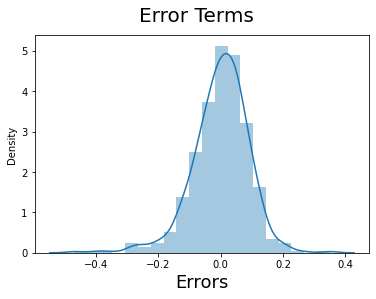

In [1225]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)          

## Prediction & Evaluation on the Test set

In [1226]:
bike_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,fall,winter,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,sun,mon,tue,wed,thu,fri,sat,low_cloud,mid_cloud,light_rain
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,10.899153,13.22605,68.7917,11.791732,2947,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
702,1,0,1,19.509153,23.45270,73.3750,11.666643,6606,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
127,0,0,0,21.661653,25.94665,63.1667,5.000712,4333,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0


In [1227]:
#scaled the Discrete variables in test data

bike_test[disc_vars] = scale.transform(bike_test[disc_vars])
bike_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,fall,winter,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,sun,mon,tue,wed,thu,fri,sat,low_cloud,mid_cloud,light_rain
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0.257562,0.243430,0.708888,0.287411,0.336516,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0.757478,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
127,0,0,0,0.584649,0.577380,0.650923,0.069510,0.495973,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0.868615,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0


In [1228]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,fall,winter,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,sun,mon,tue,wed,thu,fri,sat,low_cloud,mid_cloud,light_rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.246575,0.232877,0.077626,0.100457,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758,0.155251,0.118721,0.123288,0.155251,0.141553,0.132420,0.173516,0.652968,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.432005,0.423633,0.268194,0.301297,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125,0.362974,0.324202,0.329520,0.362974,0.349389,0.339723,0.379560,0.477117,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1229]:
prediction_vars = list(x_train_rfe.columns)
prediction_vars.remove('const')
prediction_vars.append('cnt')
prediction_vars

['yr',
 'temp',
 'windspeed',
 'spring',
 'winter',
 'jan',
 'jul',
 'sep',
 'nov',
 'dec',
 'mon',
 'tue',
 'mid_cloud',
 'light_rain',
 'cnt']

In [1230]:
#extract the predicted variables in test dataframe

bike_test = bike_test[prediction_vars]

In [1231]:
#take y_test values & x_test values
y_test = bike_test.pop('cnt')

x_test = bike_test

In [1232]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
400    0.336516
702    0.757478
127    0.495973
640    0.868615
72     0.232858
Name: cnt, Length: 219, dtype: float64

In [1233]:
x_test

,yr,temp,windspeed,spring,winter,jan,jul,sep,nov,dec,mon,tue,mid_cloud,light_rain
184,0,0.831783,0.084219,0,0,0,1,0,0,0,0,0,1,0
535,1,0.901354,0.153728,0,0,0,0,0,0,0,0,0,0,0
299,0,0.511964,0.334206,0,1,0,0,0,0,0,0,0,1,0
221,0,0.881625,0.339570,0,0,0,0,0,0,0,0,0,0,0
152,0,0.817246,0.537414,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0.257562,0.287411,1,0,0,0,0,0,0,0,1,1,0
702,1,0.519232,0.283397,0,1,0,0,0,0,1,0,0,0,0
127,0,0.584649,0.069510,0,0,0,0,0,0,0,0,1,0,0
640,1,0.745598,0.052115,0,1,0,0,0,0,0,0,0,1,0


In [1234]:
#Add constant to variables because we should also add intercept value in statsmodel library
x_test = sm.add_constant(x_test)
x_test

,const,yr,temp,windspeed,spring,winter,jan,jul,sep,nov,dec,mon,tue,mid_cloud,light_rain
184,1.0,0,0.831783,0.084219,0,0,0,1,0,0,0,0,0,1,0
535,1.0,1,0.901354,0.153728,0,0,0,0,0,0,0,0,0,0,0
299,1.0,0,0.511964,0.334206,0,1,0,0,0,0,0,0,0,1,0
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0.257562,0.287411,1,0,0,0,0,0,0,0,1,1,0
702,1.0,1,0.519232,0.283397,0,1,0,0,0,0,1,0,0,0,0
127,1.0,0,0.584649,0.069510,0,0,0,0,0,0,0,0,1,0,0
640,1.0,1,0.745598,0.052115,0,1,0,0,0,0,0,0,0,1,0


In [1235]:
# Predict the y value with the test data on the model 

y_test_pred = lm.predict(x_test)

In [1236]:
#import sklearn to find r2_score of test data

from sklearn.metrics import r2_score

In [1237]:
#Evaluate r2 for test data

r2_score(y_true=y_test, y_pred=y_test_pred)

0.8216721565571237

## r2_score for `train data` is 0.838
## r2_score for `test data` is 0.821

## The model was able to predict on the `test data` as similar to the `train data`

In [1238]:
x_test

,const,yr,temp,windspeed,spring,winter,jan,jul,sep,nov,dec,mon,tue,mid_cloud,light_rain
184,1.0,0,0.831783,0.084219,0,0,0,1,0,0,0,0,0,1,0
535,1.0,1,0.901354,0.153728,0,0,0,0,0,0,0,0,0,0,0
299,1.0,0,0.511964,0.334206,0,1,0,0,0,0,0,0,0,1,0
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0.257562,0.287411,1,0,0,0,0,0,0,0,1,1,0
702,1.0,1,0.519232,0.283397,0,1,0,0,0,0,1,0,0,0,0
127,1.0,0,0.584649,0.069510,0,0,0,0,0,0,0,0,1,0,0
640,1.0,1,0.745598,0.052115,0,1,0,0,0,0,0,0,0,1,0


## Equation of our best fitted model is

In [1241]:
#code to create equation for the model

eqn = 'cnt = '

for val in zip(lm.params.values, lm.params.index):
    eqn = eqn + '(' + str(round(val[0], 3)) + ' * ' + str(val[1]) + ') + '

print(eqn[:-2].replace(' * const', ''))

cnt = (0.298) + (0.235 * yr) + (0.397 * temp) + (-0.151 * windspeed) + (-0.107 * spring) + (0.067 * winter) + (-0.057 * jan) + (-0.059 * jul) + (0.05 * sep) + (-0.058 * nov) + (-0.053 * dec) + (-0.024 * mon) + (-0.032 * tue) + (-0.081 * mid_cloud) + (-0.295 * light_rain) 


## Effect of the variables on the model from Positive to Negative

In [1240]:
lm.params.sort_values(ascending=False)

temp          0.397465
const         0.298102
yr            0.235227
winter        0.067093
sep           0.049773
mon          -0.023903
tue          -0.031618
dec          -0.053121
jan          -0.057018
nov          -0.057944
jul          -0.059174
mid_cloud    -0.080642
spring       -0.106824
windspeed    -0.150579
light_rain   -0.294931
dtype: float64